# Linear Regression with TensorFlow

# UNFINISHED EXCERCISE

Linear Regression¬∂


Defining a linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states".

When more than one independent variable is present the process is called multiple linear regression.
When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is

ùëå=ùëéùëã+ùëè
 
Where Y is the dependent variable and X is the independent variable, and a and b being the parameters we adjust. a is known as "slope" or "gradient" and b is the "intercept". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.

In [16]:
pip show tensorflow #check version of tensorflow

Name: tensorflow
Version: 2.8.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\mleeuw\anaconda3\lib\site-packages
Requires: tf-estimator-nightly, opt-einsum, protobuf, tensorboard, setuptools, six, termcolor, libclang, h5py, tensorflow-io-gcs-filesystem, gast, absl-py, flatbuffers, google-pasta, numpy, grpcio, wrapt, keras, keras-preprocessing, astunparse, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show grpcio

Name: grpcio
Version: 1.44.0
Summary: HTTP/2-based RPC framework
Home-page: https://grpc.io
Author: The gRPC Authors
Author-email: grpc-io@googlegroups.com
License: Apache License 2.0
Location: c:\users\mleeuw\anaconda3\lib\site-packages
Requires: six
Required-by: tensorflow, tensorboard
Note: you may need to restart the kernel to use updated packages.


Import the required packages:

In [3]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pylab as pl 
import matplotlib.patches as mpatches 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
#defining independent variables 

X =np.arange(0.0, 5.0,0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

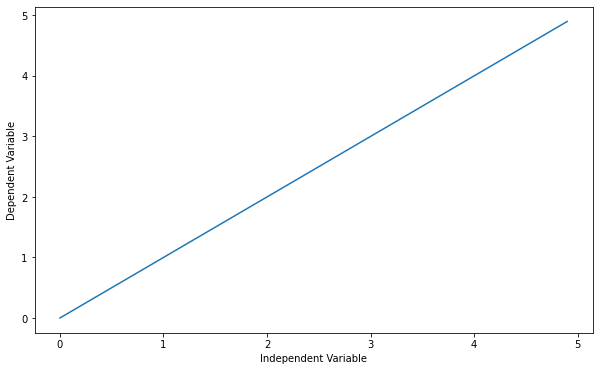

In [5]:
#You can adjust the slope and intercept to verify the changes in the graph 

a = 1
b = 0 

Y = a* X + b 

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()


When we perform an experiment and gather the data, or if we already have a dataset and we want to perform a linear regression, what we will do is adjust a simple linear model to the dataset, we adjust the "slope" and "intercept" parameters to the data the best way possible, because the closer the model comes to describing each ocurrence, the better it will be at representing them.

So how is this "regression" performed?

<a id="ref2"></a>

<h1>Linear Regression with TensorFlow</h1>


A simple example of a linear function can help us understand the basic mechanism behind TensorFlow.

For the first part we will use a sample dataset, and then we'll use TensorFlow to adjust and get the right parameters. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars.


In [7]:
#load data from github 
df = pd.read_csv('https://raw.githubusercontent.com/sudhanshu456/Machine-Learning-with-Python-IBM/master/Week%202/Data_set/FuelConsumption.csv')
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

Lets say we want to use Linear Regression to predict CoEmission of cars based on their engine size.So, lets define X and Y value for the linear regression, that is ,train_x and train_y: 

In [8]:
train_x= np.asanyarray(df[['ENGINESIZE']])
train_y =np.asanyarray(df[['CO2EMISSIONS']])

First we iitializes the variables a and b , with any random guess, and then we define the linear function

In [9]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)

def h(x):
    y = a*x + b
    return y

Now, we are going to define a loss function for our regression, so we can train our model to better fit our data. In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

To find value of our loss, we use tf.reduce_mean(). This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [10]:
def loss_object(y, train_y):
    return tf.reduce_mean(tf.square(y - train_y)) 
# Below is a predefined method offered by TensorFlow to calculate loss function
    #loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

Now we are ready to start training and run the graph. We use GradientTape to calculate gradient 

In [11]:
learning_rate = 0.01
train_data = []
loss_values = []
a_values = []
b_values = []
#steps of looping through all your data to update the parameters 
training_epochs = 200

#train model 

for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_object(train_y, y_predicted)
        loss_values.append(loss_value)
        
        #get gradients
        gradients = tape.gradient(loss_value, [b,a])
        
        #compute and adjust weights 
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(),b.numpy()])

            
            
            


Lets plot the loss values to see how it has changed during the training

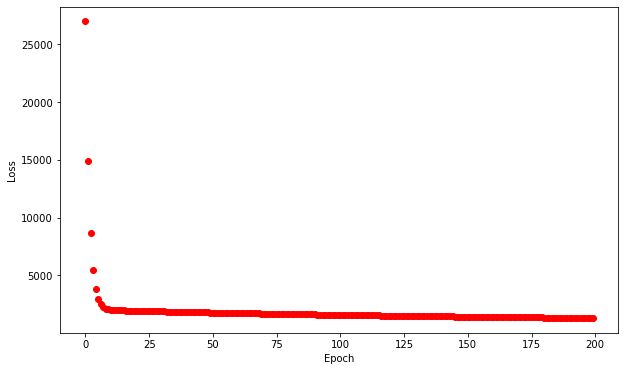

In [12]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

Lets visualize how the coeffient and the intercept of the line has changed to fit the data:

The green dots are the data points, the red lies are created using the a and b coefficients during training, and the black line is the line we use to model the relatonship with the final/last coefficients 

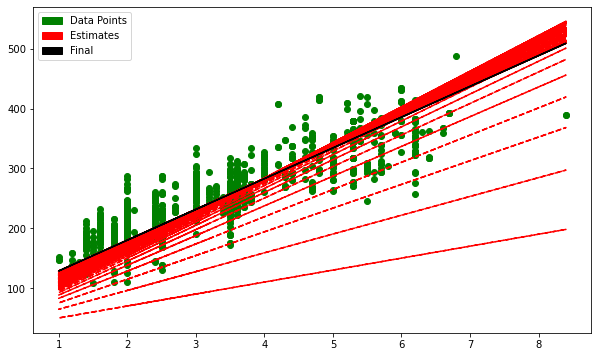

In [13]:
plt.scatter(train_x, train_y, color='green')
for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
    plt.plot(train_x,a*train_x+b, color='red', linestyle='dashed')
plt.plot(train_x,a_values[-1]*train_x+b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()

<hr>

Credits to primarily: IBM DEVELOPER SKILLS NETWORK- Created by Romeo Kienzler , Saeed Aghabozorgi , Rafael Belo Da Silva